In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample/SampleSuperstore.csv


In [12]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [14]:
# Read data

train_data = pd.read_csv("/kaggle/input/sample/SampleSuperstore.csv")

In [15]:
#view first 5 rows train data
train_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
# check number of rows and columns of train data

train_data.shape

(9994, 13)

In [17]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# preprocessing

In [18]:
# checking missing values
train_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
## Check for Duplicates and Remove 
train_data.duplicated().sum() 
train_data.drop_duplicates(inplace = True) 

In [20]:
train_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Data Visualization

(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

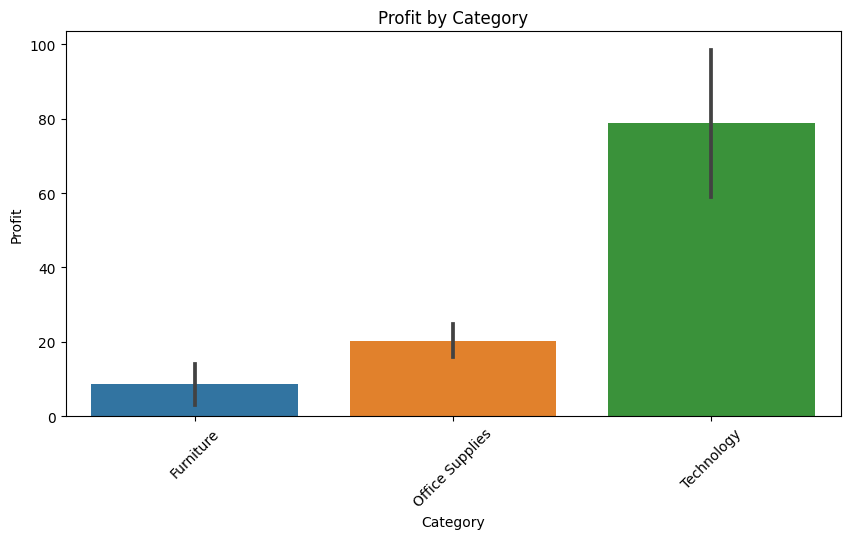

In [21]:
# 1. Profit Analysis
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Profit", data=train_data)
plt.title("Profit by Category")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Sales vs. Profit')

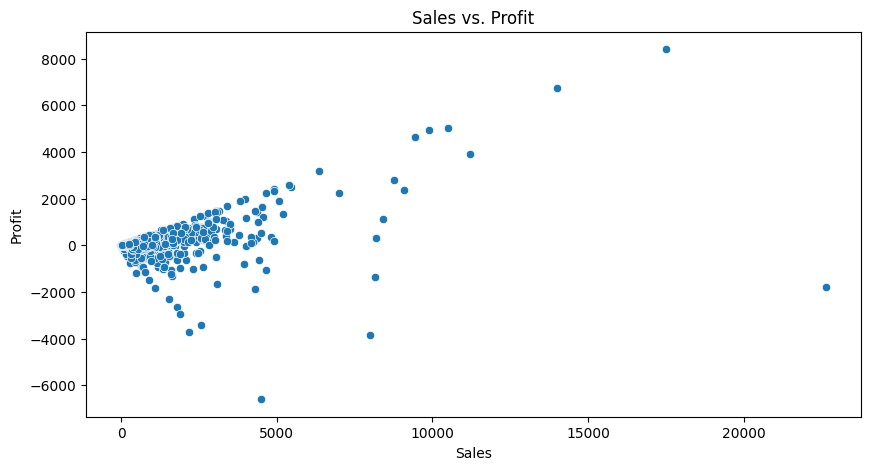

In [22]:
# 2. Sales vs. Profit
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Sales", y="Profit", data=train_data)
plt.title("Sales vs. Profit")

Text(0.5, 1.0, 'Region-wise Sales by Category')

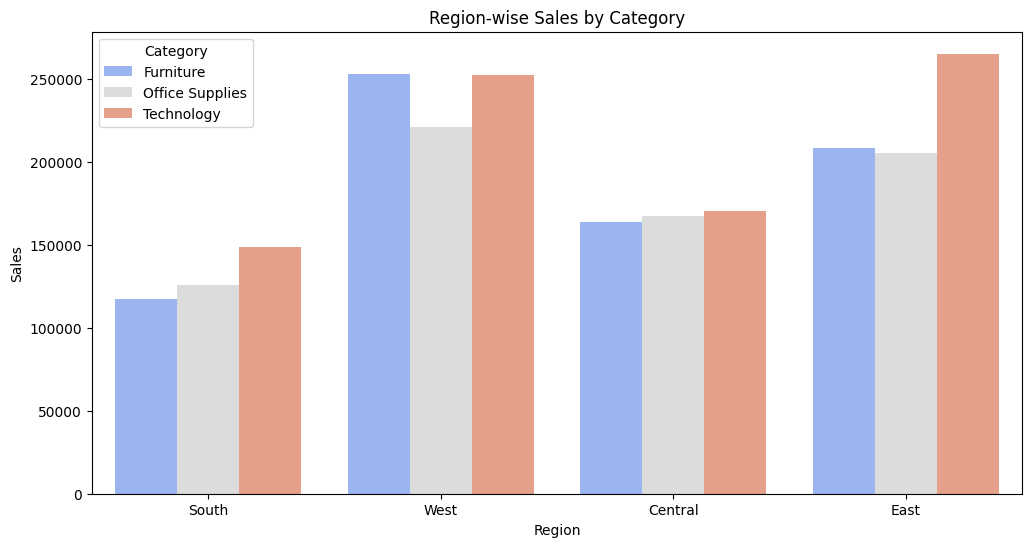

In [23]:
# 3. Region-wise Sales and Profit
plt.figure(figsize=(12, 6))
sns.barplot(x="Region", y="Sales", data=train_data, estimator=sum, ci=None, palette="coolwarm", hue="Category")
plt.title("Region-wise Sales by Category")


Text(0.5, 1.0, 'Region-wise Profit by Category')

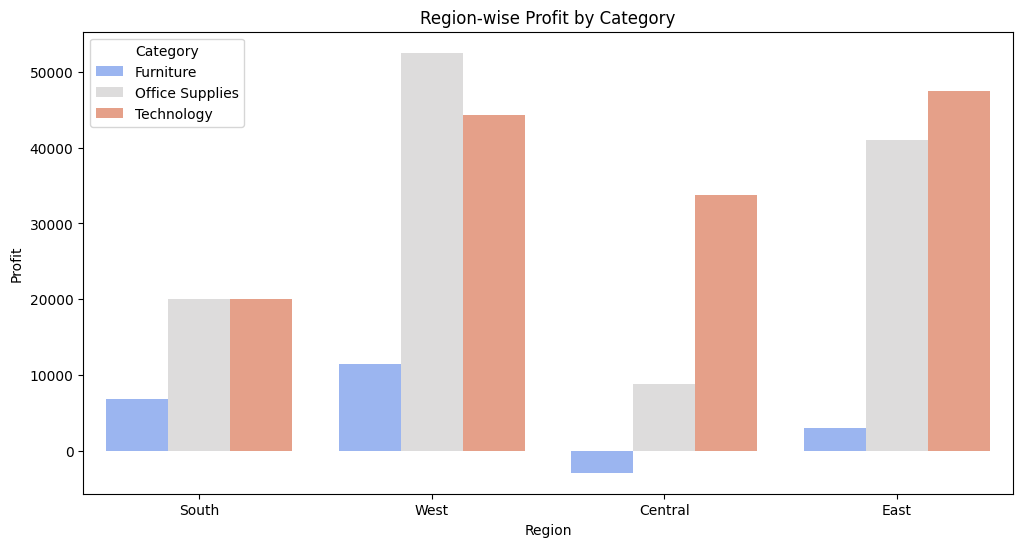

In [24]:
# 4. Region-wise Region and Profit
plt.figure(figsize=(12, 6))
sns.barplot(x="Region", y="Profit", data=train_data, estimator=sum, ci=None, palette="coolwarm", hue="Category")
plt.title("Region-wise Profit by Category")


Text(0.5, 1.0, 'Shipping Mode Analysis')

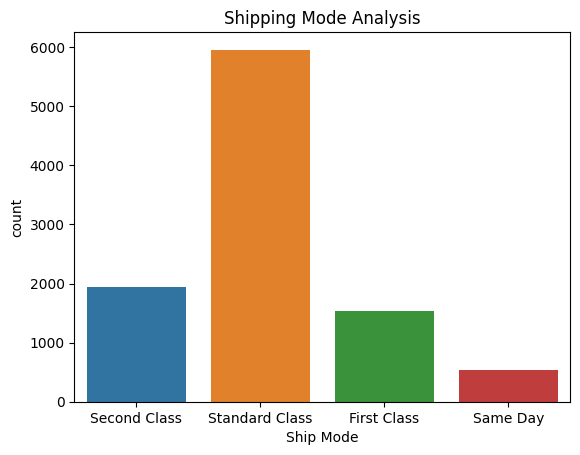

In [26]:
# 5. Shipping Mode Analysis
sns.countplot(x="Ship Mode", data=train_data)
plt.title("Shipping Mode Analysis")


Text(0.5, 1.0, 'Customer Segment Analysis')

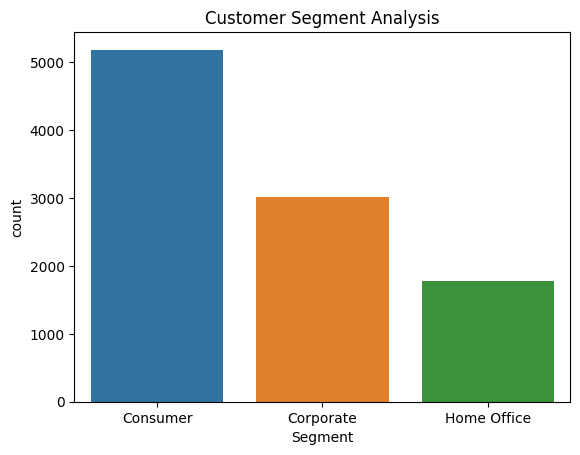

In [27]:
# 6. Segment Analysis
sns.countplot(x="Segment", data=train_data)
plt.title("Customer Segment Analysis")


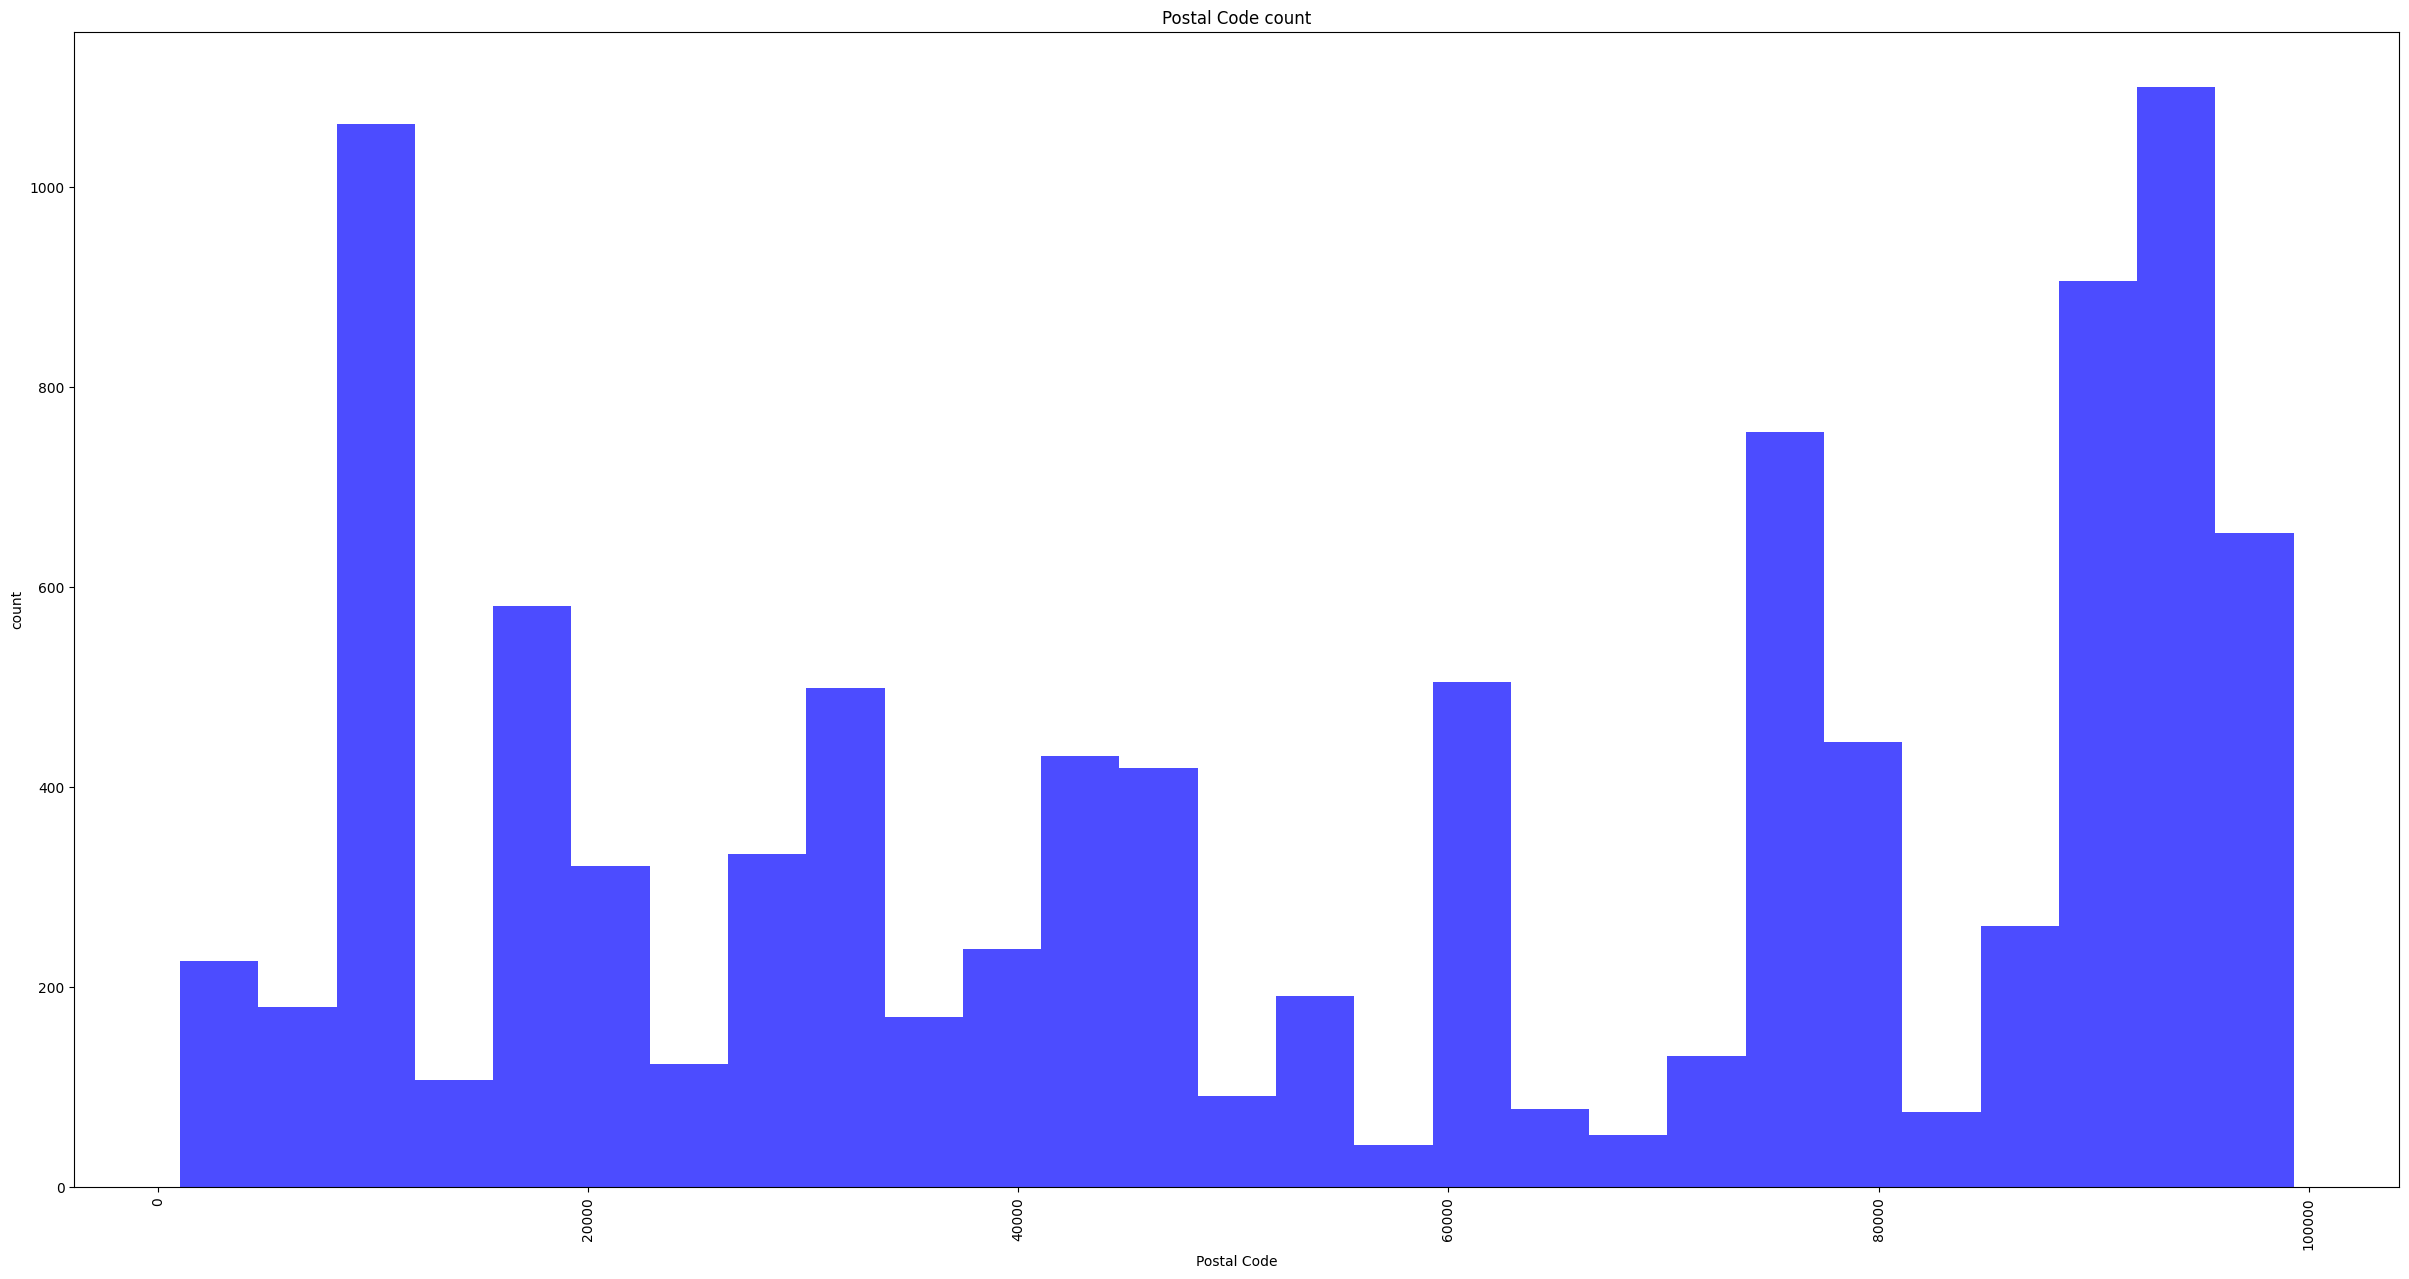

In [28]:
#7 Create a histogram of genre distribution
plt.figure(figsize=(30, 15))
plt.hist(train_data["Postal Code"],bins =27 , color='blue', alpha=0.7)
plt.title("Postal Code count")
plt.xlabel("Postal Code")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

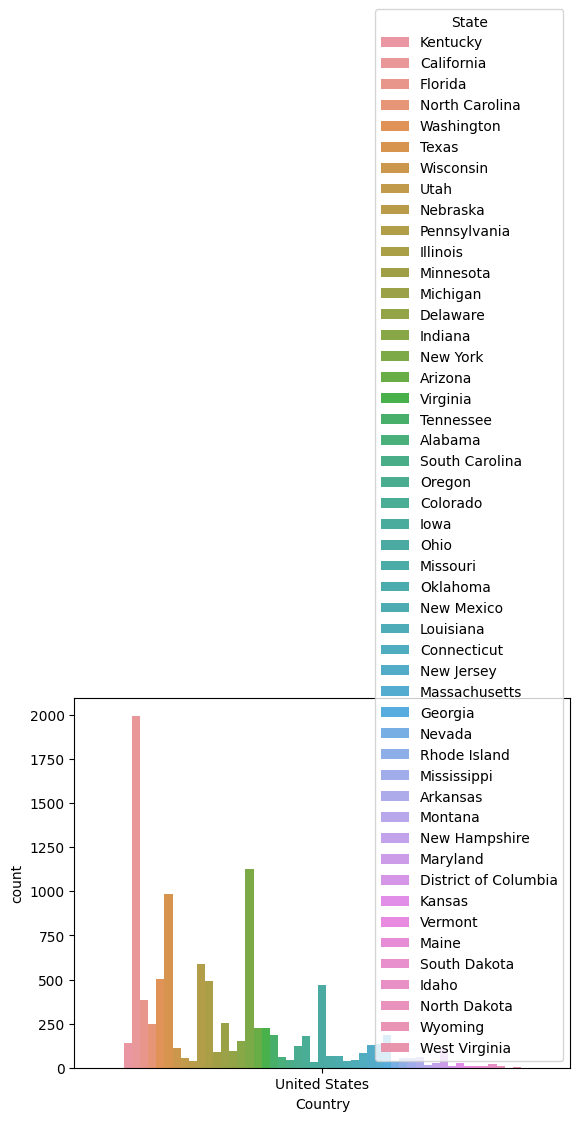

In [29]:
#8 visual representation
sns.countplot(x='Country',hue='State',data=train_data)
plt.show()

Text(0.5, 1.0, 'Top 10 Products by Sales')

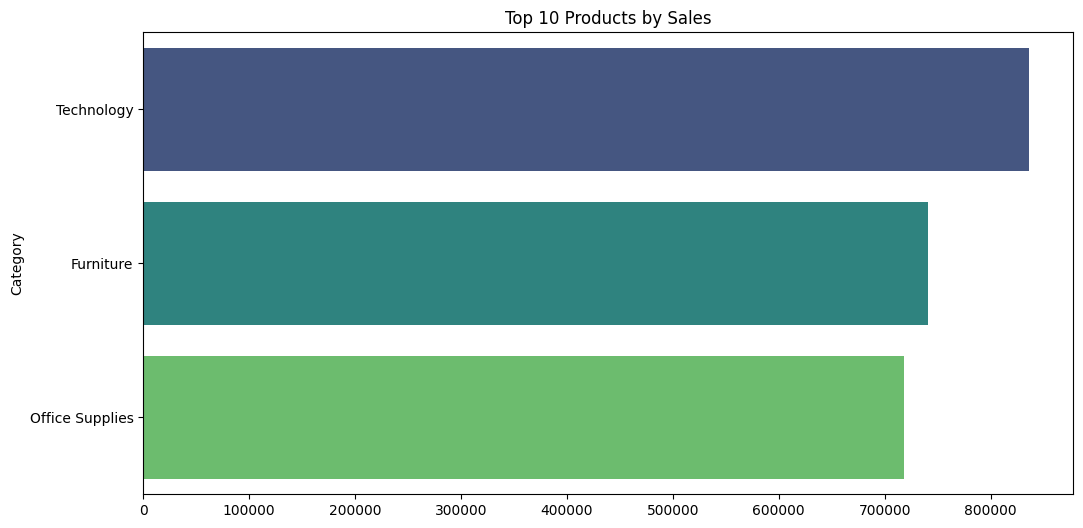

In [31]:
# 9. Category
top_products = train_data.groupby("Category")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")

Text(0.5, 1.0, 'Top 10 Products by Sales')

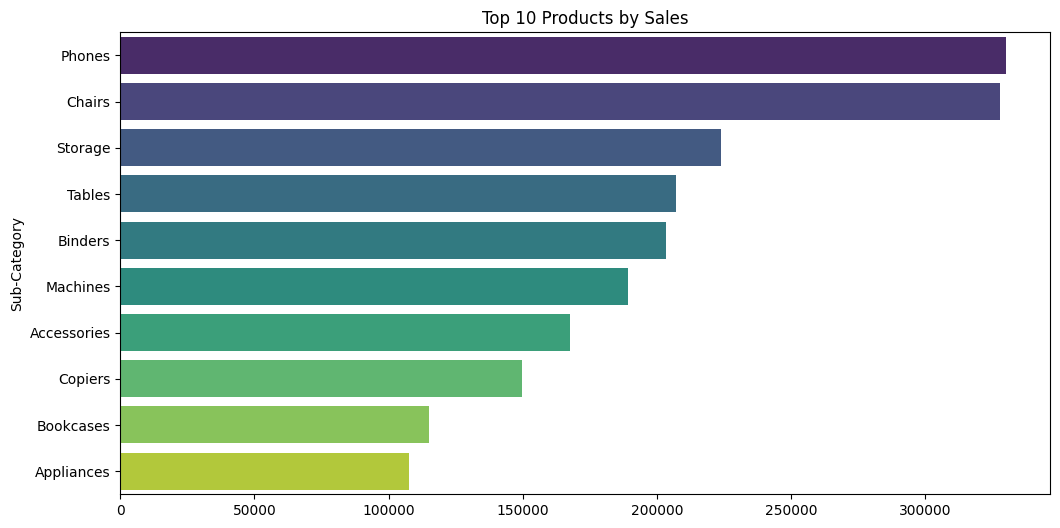

In [32]:
# 10. Top Sub-Category
top_products = train_data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")

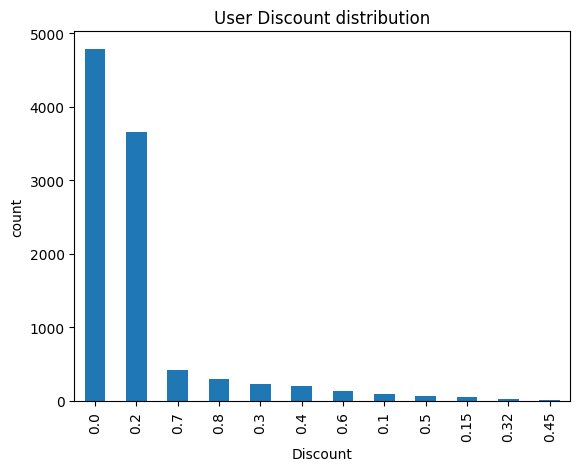

In [37]:
#11 visual representation

train_data['Discount'].value_counts().plot(kind='bar')
plt.title('User Discount distribution')
plt.xlabel('Discount')
plt.ylabel('count')
plt.show()

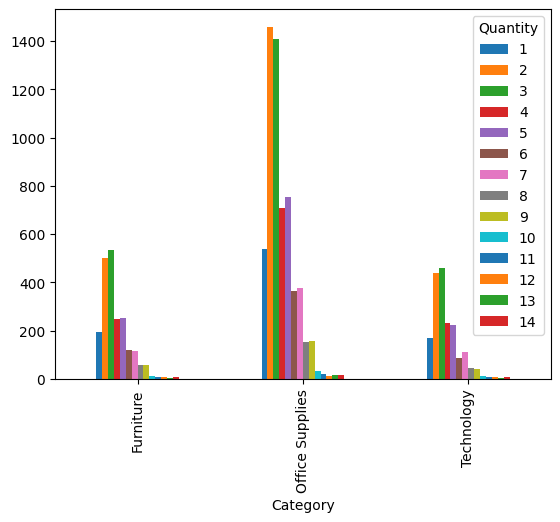

In [39]:
#12 visual representation

train_data.groupby(['Category','Quantity']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.show()